In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data 
PATH="data/"

raw_app_train = pd.read_csv(PATH + "application_train.csv")
raw_app_test = pd.read_csv(PATH + "application_test.csv")
raw_bureau = pd.read_csv(PATH + "bureau.csv")
raw_bureau_balance = pd.read_csv(PATH + "bureau_balance.csv")
raw_credit_balance = pd.read_csv(PATH + "credit_card_balance.csv")
raw_install_pay = pd.read_csv(PATH + "installments_payments.csv")
raw_pos_balance = pd.read_csv(PATH + "POS_CASH_balance.csv")
raw_prev_app = pd.read_csv(PATH + "previous_application.csv")

In [5]:
# Load columns description
# cols_desc = pd.read_csv(PATH + "HomeCredit_columns_description.csv", encoding = 'unicode_escape')

In [6]:
# Overview

# Size of data
print("Size of application_train:", raw_app_train.shape)
print("Size of application_test:", raw_app_test.shape)
print("Size of bureau:", raw_bureau.shape)
print("Size of bureau_balance:", raw_bureau_balance.shape)
print("Size of credit_card_balance:", raw_credit_balance.shape)
print("Size of installments_payments:", raw_install_pay.shape)
print("Size of POS_CASH_balance:", raw_pos_balance.shape)
print("Size of previous_application:", raw_prev_app.shape)

Size of application_train: (307511, 122)
Size of application_test: (48744, 121)
Size of bureau: (1716428, 17)
Size of bureau_balance: (27299925, 3)
Size of credit_card_balance: (3840312, 23)
Size of installments_payments: (13605401, 8)
Size of POS_CASH_balance: (10001358, 8)
Size of previous_application: (1670214, 37)


In [7]:
# Info about loan and loan applicant time
raw_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Attributes in application
raw_app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [9]:
# One row per client's loan in credit bureau
# Connect with application by SK_ID_CURR
raw_bureau.head() 

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [10]:
# Attributes in bureau
raw_bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [11]:
# Monthly balance of credits in credit bureau
# Connect with bureau by SK_ID_BUREAU
raw_bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [12]:
# Attributes in bureau
raw_bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [13]:
# Previous application
# Connect with application by SK_ID_CURR
raw_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Attributes in prev application
raw_prev_app.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [15]:
# Monthly balance of client's prev loans
# Connect with prev application by SK_ID_PREV
# Connect with application by SK_ID_CURR
raw_pos_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [16]:
# Attributes in pos cash balance
raw_pos_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [17]:
# Past payment data for each installments
# Connect with prev application by SK_ID_PREV
# Connect with application by SK_ID_CURR
raw_install_pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [18]:
# Attributes in installments pay
raw_install_pay.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [19]:
# Monthly balance of client's prev credit crad loans
# Connect with prev application by SK_ID_PREV
# Connect with application by SK_ID_CURR
raw_credit_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [20]:
# Attributes in prev credit card balance
raw_credit_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [73]:
# Computing the percent of missing data
def get_missing_rate(data):
    res = dict()
    for temp in data.columns.values:
        exist_cont = data[temp].isnull().sum()
        tot_cont = data[temp].isnull().count()
        res[temp] = exist_cont * 100 / tot_cont
    return pd.DataFrame.from_dict(res, orient = 'index', columns = ['missing_rate']).sort_values(by = 'missing_rate', ascending = False)

# Show the missing info
def check_missing(data, name, fig_size = (5, 3)):
    print("=== Check missing for " + name + " ===")
    temp_df = get_missing_rate(data)
    missing_df = temp_df[temp_df['missing_rate'] > 0]
    existing_df = temp_df[temp_df['missing_rate'] == 0]
    print('The number of columns which are missing data is', missing_df.shape[0])
    if missing_df.shape[0] != 0:
        missing_df.plot(kind = 'bar', figsize = fig_size)
    print('The number of columns which are existing data is', existing_df.shape[0])
    print('The existing columns are:')
    print(existing.index.values)
    return

=== Check missing for application_train ===
The number of columns which are missing data is 67
The number of columns which are existing data is 55
The existing columns are:
['CNT_CHILDREN' 'FLAG_DOCUMENT_8' 'NAME_CONTRACT_TYPE' 'CODE_GENDER'
 'FLAG_OWN_CAR' 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_4'
 'FLAG_DOCUMENT_5' 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7' 'FLAG_DOCUMENT_9'
 'FLAG_DOCUMENT_21' 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11'
 'FLAG_OWN_REALTY' 'FLAG_DOCUMENT_13' 'FLAG_DOCUMENT_14'
 'FLAG_DOCUMENT_15' 'FLAG_DOCUMENT_16' 'FLAG_DOCUMENT_17'
 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_19' 'FLAG_DOCUMENT_20'
 'FLAG_DOCUMENT_12' 'AMT_CREDIT' 'AMT_INCOME_TOTAL' 'FLAG_PHONE'
 'LIVE_CITY_NOT_WORK_CITY' 'REG_CITY_NOT_WORK_CITY' 'TARGET'
 'REG_CITY_NOT_LIVE_CITY' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_REGION_NOT_WORK_REGION' 'REG_REGION_NOT_LIVE_REGION'
 'HOUR_APPR_PROCESS_START' 'WEEKDAY_APPR_PROCESS_START'
 'REGION_RATING_CLIENT_W_CITY' 'REGION_RATING_CLIENT' 'FLAG_EMAIL'
 'FLAG_CONT_MOBILE' 

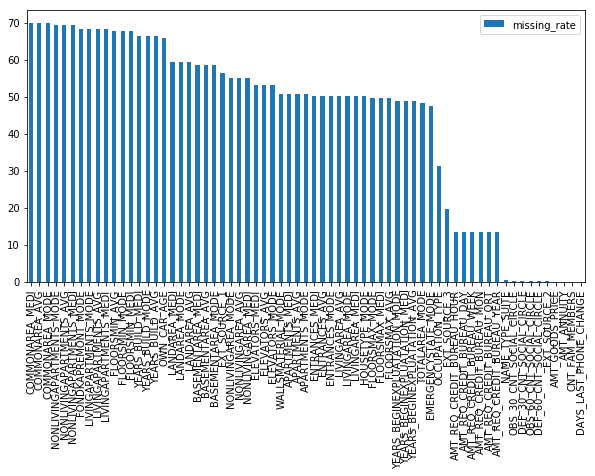

In [74]:
# Check missing for application train
check_missing(raw_app_train, 'application_train', (10, 5))

=== Check missing for bureau ===
The number of columns which are missing data is 7
The number of columns which are existing data is 10
The existing columns are:
['CNT_CHILDREN' 'FLAG_DOCUMENT_8' 'NAME_CONTRACT_TYPE' 'CODE_GENDER'
 'FLAG_OWN_CAR' 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_4'
 'FLAG_DOCUMENT_5' 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7' 'FLAG_DOCUMENT_9'
 'FLAG_DOCUMENT_21' 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11'
 'FLAG_OWN_REALTY' 'FLAG_DOCUMENT_13' 'FLAG_DOCUMENT_14'
 'FLAG_DOCUMENT_15' 'FLAG_DOCUMENT_16' 'FLAG_DOCUMENT_17'
 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_19' 'FLAG_DOCUMENT_20'
 'FLAG_DOCUMENT_12' 'AMT_CREDIT' 'AMT_INCOME_TOTAL' 'FLAG_PHONE'
 'LIVE_CITY_NOT_WORK_CITY' 'REG_CITY_NOT_WORK_CITY' 'TARGET'
 'REG_CITY_NOT_LIVE_CITY' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_REGION_NOT_WORK_REGION' 'REG_REGION_NOT_LIVE_REGION'
 'HOUR_APPR_PROCESS_START' 'WEEKDAY_APPR_PROCESS_START'
 'REGION_RATING_CLIENT_W_CITY' 'REGION_RATING_CLIENT' 'FLAG_EMAIL'
 'FLAG_CONT_MOBILE' 'ORGANIZATIO

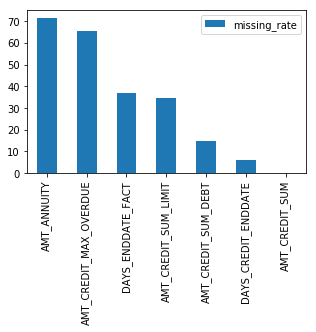

In [75]:
# Check missing for bureau
check_missing(raw_bureau, 'bureau')

In [76]:
# Check for bureau_balance
check_missing(raw_bureau_balance, 'bureau_balance')

=== Check missing for bureau_balance ===
The number of columns which are missing data is 0
The number of columns which are existing data is 3
The existing columns are:
['CNT_CHILDREN' 'FLAG_DOCUMENT_8' 'NAME_CONTRACT_TYPE' 'CODE_GENDER'
 'FLAG_OWN_CAR' 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_4'
 'FLAG_DOCUMENT_5' 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7' 'FLAG_DOCUMENT_9'
 'FLAG_DOCUMENT_21' 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11'
 'FLAG_OWN_REALTY' 'FLAG_DOCUMENT_13' 'FLAG_DOCUMENT_14'
 'FLAG_DOCUMENT_15' 'FLAG_DOCUMENT_16' 'FLAG_DOCUMENT_17'
 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_19' 'FLAG_DOCUMENT_20'
 'FLAG_DOCUMENT_12' 'AMT_CREDIT' 'AMT_INCOME_TOTAL' 'FLAG_PHONE'
 'LIVE_CITY_NOT_WORK_CITY' 'REG_CITY_NOT_WORK_CITY' 'TARGET'
 'REG_CITY_NOT_LIVE_CITY' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_REGION_NOT_WORK_REGION' 'REG_REGION_NOT_LIVE_REGION'
 'HOUR_APPR_PROCESS_START' 'WEEKDAY_APPR_PROCESS_START'
 'REGION_RATING_CLIENT_W_CITY' 'REGION_RATING_CLIENT' 'FLAG_EMAIL'
 'FLAG_CONT_MOBILE' 'ORGA

=== Check missing for previous_application ===
The number of columns which are missing data is 16
The number of columns which are existing data is 21
The existing columns are:
['CNT_CHILDREN' 'FLAG_DOCUMENT_8' 'NAME_CONTRACT_TYPE' 'CODE_GENDER'
 'FLAG_OWN_CAR' 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_4'
 'FLAG_DOCUMENT_5' 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7' 'FLAG_DOCUMENT_9'
 'FLAG_DOCUMENT_21' 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11'
 'FLAG_OWN_REALTY' 'FLAG_DOCUMENT_13' 'FLAG_DOCUMENT_14'
 'FLAG_DOCUMENT_15' 'FLAG_DOCUMENT_16' 'FLAG_DOCUMENT_17'
 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_19' 'FLAG_DOCUMENT_20'
 'FLAG_DOCUMENT_12' 'AMT_CREDIT' 'AMT_INCOME_TOTAL' 'FLAG_PHONE'
 'LIVE_CITY_NOT_WORK_CITY' 'REG_CITY_NOT_WORK_CITY' 'TARGET'
 'REG_CITY_NOT_LIVE_CITY' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_REGION_NOT_WORK_REGION' 'REG_REGION_NOT_LIVE_REGION'
 'HOUR_APPR_PROCESS_START' 'WEEKDAY_APPR_PROCESS_START'
 'REGION_RATING_CLIENT_W_CITY' 'REGION_RATING_CLIENT' 'FLAG_EMAIL'
 'FLAG_CONT_MOBIL

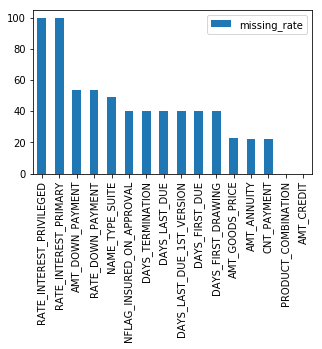

In [77]:
# Check for prev application
check_missing(raw_prev_app, 'previous_application')

In [ ]:
# Check for prev application
check_missing(raw_prev_app, 'previous_application')